In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [45]:
1+1

2

#here is a heading

##a smaller one

###an even smaller one

####even less important

and here is some text

hello world

http://www.google.com

[hello world](http://www.google.com)

here is an equation $E = m c^2$

$$ \alpha = \beta $$

hello **bold**, nor *emph*

In [11]:
#also https://dl.dropboxusercontent.com/u/75194/tao-full.csv
dfsmall=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/tao.csv")
dfsmall.head()

,Unnamed: 0,year,latitude,longitude,sea.surface.temp,air.temp,humidity,uwind,vwind
0,1,1997,0,-110,27.590000,27.15,79.599998,-6.4,5.4
1,2,1997,0,-110,27.549999,27.02,75.800003,-5.3,5.3
2,3,1997,0,-110,27.570000,27.00,76.500000,-5.1,4.5
3,4,1997,0,-110,27.620001,26.93,76.199997,-4.9,2.5
4,5,1997,0,-110,27.650000,26.84,76.400002,-3.5,4.1


Primary question: Can we detect an El Nino event, based on sea surface temperature? What about other observed variables?

In [13]:
del dfsmall["Unnamed: 0"]
dfsmall.head()

,year,latitude,longitude,sea.surface.temp,air.temp,humidity,uwind,vwind
0,1997,0,-110,27.590000,27.15,79.599998,-6.4,5.4
1,1997,0,-110,27.549999,27.02,75.800003,-5.3,5.3
2,1997,0,-110,27.570000,27.00,76.500000,-5.1,4.5
3,1997,0,-110,27.620001,26.93,76.199997,-4.9,2.5
4,1997,0,-110,27.650000,26.84,76.400002,-3.5,4.1


In [12]:
dfsmall.dtypes

Unnamed: 0            int64
year                  int64
latitude              int64
longitude             int64
sea.surface.temp    float64
air.temp            float64
humidity            float64
uwind               float64
vwind               float64
dtype: object

In [14]:
dfsmall.shape

(736, 8)

In [16]:
dfsmall.groupby('year').mean()#look up groupby

,latitude,longitude,sea.surface.temp,air.temp,humidity,uwind,vwind
year,,,,,,,
1993,-1.00,-102.5,23.542110,23.365962,86.847636,-3.828804,2.496196
1997,-1.75,-102.5,28.168859,27.109794,82.632065,-3.602989,2.775272


In [39]:
dfsmall.groupby('year').describe()

air.temp    humidity    latitude   longitude  sea.surface.temp       uwind       vwind
year                                                                                                
1993 count  364.000000  275.000000  368.000000  368.000000        365.000000  368.000000  368.000000
     mean    23.365962   86.847636   -1.000000 -102.500000         23.542110   -3.828804    2.496196
     std      0.810965    2.936683    1.001361    7.510211          0.877629    1.819194    1.595203
     min     21.420000   79.800003   -2.000000 -110.000000         21.600000   -7.800000   -4.300000
     25%     22.730000   85.149998   -2.000000 -110.000000         22.840000   -5.100000    1.600000
     50%     23.379999   87.400002   -1.000000 -102.500000         23.500000   -3.900000    2.600000
     75%     23.900000   89.000000    0.000000  -95.000000         24.070000   -2.700000    3.500000
     max     25.030001   92.199997    0.000000  -95.000000         26.379999    3.300000    6.300000
1997 count  291.000000  368.000000  368.000000  368.000000        368.000000  368.000000  368.000000
     mean    27.109794   82.632065   -1.750000 -102.500000         28.168859   -3.602989    2.775272
     std      0.617771    4.773291    2.049124    7.510211          0.710235    2.085480    2.516228
     min     25.200001   71.599998   -5.000000 -110.000000         26.480000   -8.100000   -6.200000
     25%     26.790001   79.074999   -2.750000 -110.000000         27.627500   -5.100000    1.375000
     50%     27.150000   82.500000   -1.000000 -102.500000         28.209999   -3.800000    3.500000
     75%     27.575000   86.500000    0.000000  -95.000000         28.662500   -2.300000    4.600000
     max     28.500000   94.800003    0.000000  -95.000000         30.170000    4.300000    7.300000

In [19]:
dfsmall.columns

Index([u'year', u'latitude', u'longitude', u'sea.surface.temp', u'air.temp', u'humidity', u'uwind', u'vwind'], dtype='object')

In [20]:
for feat in dfsmall.columns:
    print feat, dfsmall[feat].isnull().mean()

year 0.0
latitude 0.0
longitude 0.0
sea.surface.temp 0.00407608695652
air.temp 0.110054347826
humidity 0.126358695652
uwind 0.0
vwind 0.0


In [27]:
for k,v in dfsmall.groupby('year'):
    for feat in dfsmall.columns:
        print k, feat, v[feat].isnull().mean()

1993 year 0.0
1993 latitude 0.0
1993 longitude 0.0
1993 sea.surface.temp 0.00815217391304
1993 air.temp 0.0108695652174
1993 humidity 0.252717391304
1993 uwind 0.0
1993 vwind 0.0
1997 year 0.0
1997 latitude 0.0
1997 longitude 0.0
1997 sea.surface.temp 0.0
1997 air.temp 0.209239130435
1997 humidity 0.0
1997 uwind 0.0
1997 vwind 0.0


In [28]:
dfsmallnew=dfsmall[dfsmall['humidity'].notnull()]

In [29]:
dfsmallnew.shape

(643, 8)

In [30]:
dfsmallnew=dfsmallnew[dfsmallnew['air.temp'].notnull()]
dfsmallnew=dfsmallnew[dfsmallnew['sea.surface.temp'].notnull()]
dfsmallnew.shape

(565, 8)

In [31]:
dfsmallnew.head()

,year,latitude,longitude,sea.surface.temp,air.temp,humidity,uwind,vwind
0,1997,0,-110,27.590000,27.15,79.599998,-6.4,5.4
1,1997,0,-110,27.549999,27.02,75.800003,-5.3,5.3
2,1997,0,-110,27.570000,27.00,76.500000,-5.1,4.5
3,1997,0,-110,27.620001,26.93,76.199997,-4.9,2.5
4,1997,0,-110,27.650000,26.84,76.400002,-3.5,4.1


In [32]:
dfsmallnew.groupby('year').count()

,latitude,longitude,sea.surface.temp,air.temp,humidity,uwind,vwind
year,,,,,,,
1993,274,274,274,274,274,274,274
1997,291,291,291,291,291,291,291


In [34]:
sns.pairplot(dfsmallnew, hue="year", size=2.5, alpha=0.3);#ahap happened here?
#look up http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html

TypeError: pairplot() got an unexpected keyword argument 'alpha'

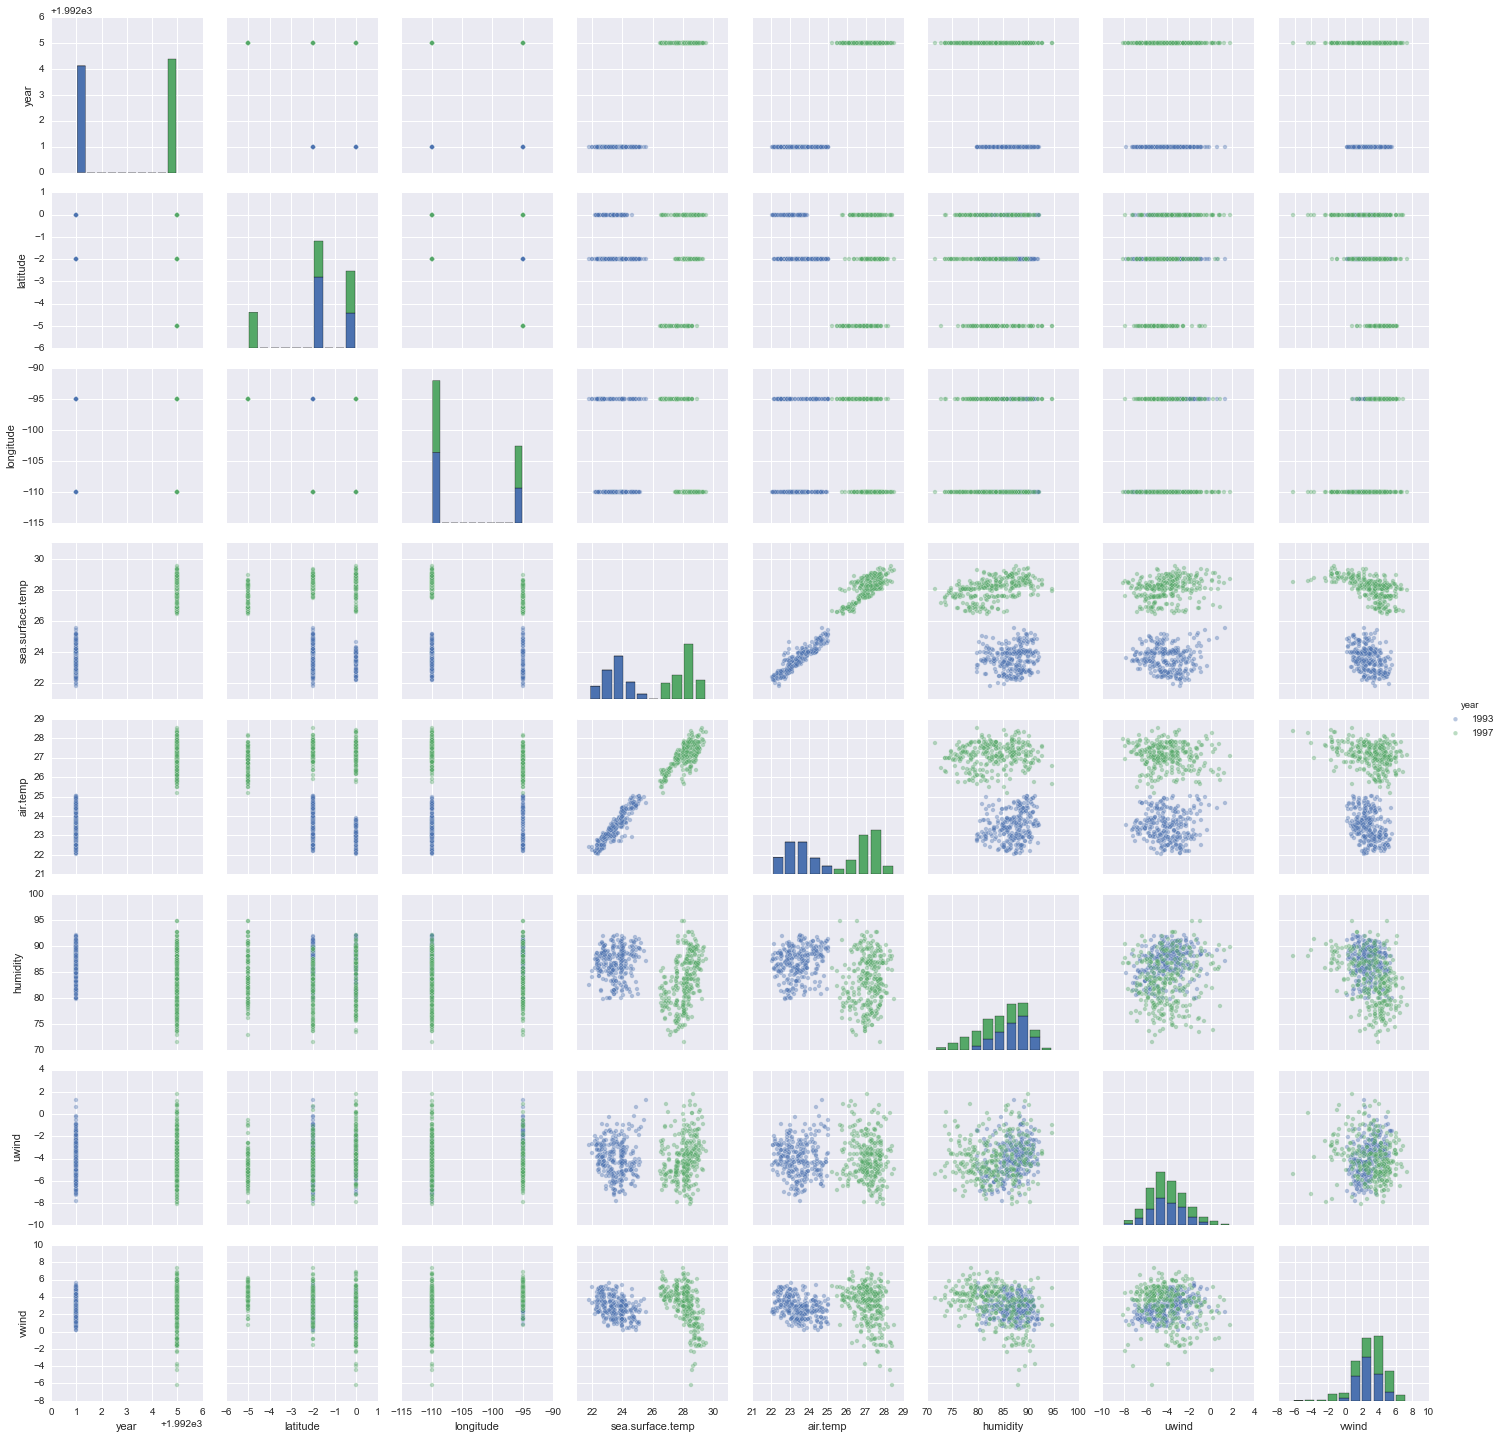

In [35]:
sns.pairplot(dfsmallnew, hue="year", size=2.5, plot_kws={'alpha':0.4});


In [36]:
vars=list(dfsmallnew.columns)
vars

['year',
 'latitude',
 'longitude',
 'sea.surface.temp',
 'air.temp',
 'humidity',
 'uwind',
 'vwind']

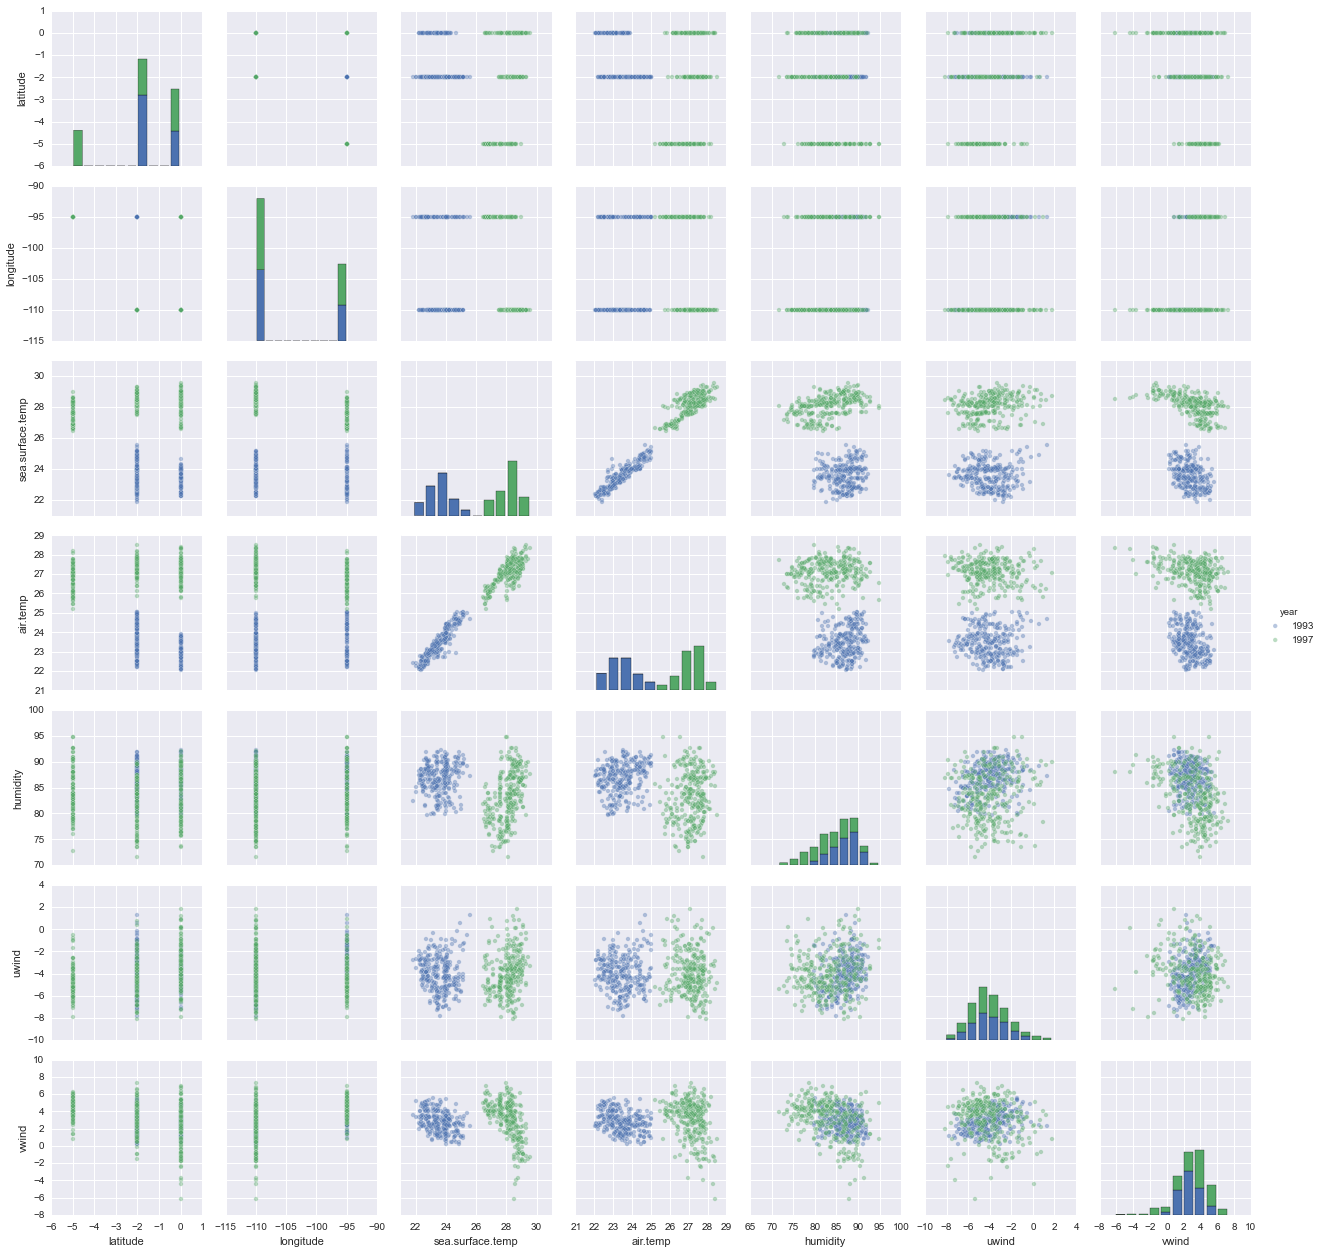

In [38]:
sns.pairplot(dfsmallnew, hue="year", size=2.5, plot_kws={'alpha':0.4}, vars=vars[1:]);

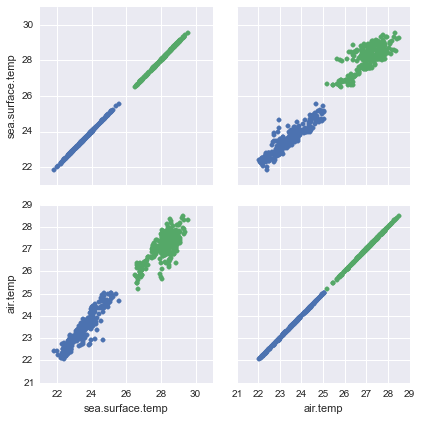

In [40]:
g = sns.PairGrid(dfsmallnew, vars=["sea.surface.temp", "air.temp"], hue="year")
g.map(plt.scatter)

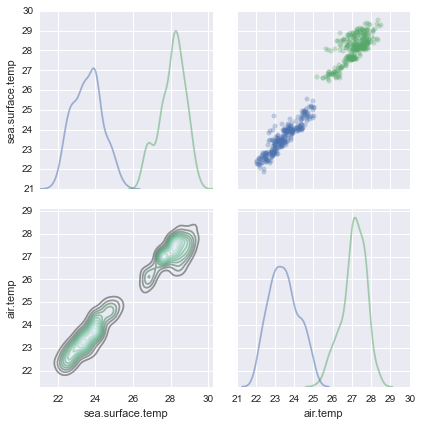

In [43]:
g = sns.PairGrid(dfsmallnew, vars=["sea.surface.temp", "air.temp"], hue="year")
g.map_upper(plt.scatter, alpha=0.3)
g.map_diag(sns.kdeplot, alpha=0.5)
g.map_lower(sns.kdeplot, alpha=0.5)

In [ ]:
dfsmall.